In [171]:
import numpy as np
import pandas as pd

____________

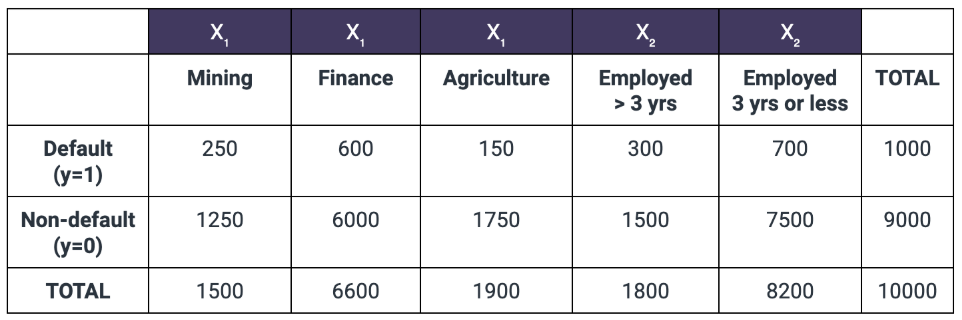

Rows are $Y$ - target variables

Columns are $X_1, X_2, \cdots$ - features

In [172]:
def gen_classifier_dataframe(list_of_matrices, Y_col):
    X_counts = [matrix.shape[1] for matrix in list_of_matrices]
    df = pd.concat([pd.DataFrame(matrix) for matrix in list_of_matrices], axis=1)
    df.index = Y_col
    temp_cols = []
    for idx, matrix in enumerate(list_of_matrices):
        colname = [f"X{idx+1}"] * matrix.shape[1]
        temp_cols += colname
    df.columns = temp_cols
    
    # Create MultiIndex using arrays
    level_1 = df.columns
    level_2 = []
    for count in X_counts:
        level_2 += np.arange(count).tolist()
    df.columns = pd.MultiIndex.from_arrays([level_1, level_2], names=['Group', 'Index'])
    return df

# def P_x(x_arr, classifier_df):
#     # TODO

def P_x_given_y(classifier_df, x_arr, y):
    # P(X1=x1, X2=x2 | Y=y) -> Probability of X1 = x1, X2 = x2, ... given Y=y
    # x_arr = [2, 0] <- Example
    
    d = x_arr.shape[0]
    P = 1
    for i in range(d):
        P *= classifier_df.loc[:, f"X{i+1}"].loc[y, x_arr[i]] / (classifier_df.loc[:, f"X{i+1}"].loc[y, :]).sum()
    return P

# def P_y_given_x(classifier_df, x_arr, y, P_x=1):
#     # TODO

X1_obs = np.array([
    [250, 600, 150],
    [1250, 6000, 1750]
])

X2_obs = np.array([
    [300, 700],
    [1500, 7500]
])

list_of_matrices = [X1_obs, X2_obs]
Y_col = [1, 0]

In [173]:
df = gen_classifier_dataframe(list_of_matrices, Y_col)
df

Group    X1                X2      
Index     0     1     2     0     1
1       250   600   150   300   700
0      1250  6000  1750  1500  7500

In [174]:
df.loc[:, "X1"]

Index,0,1,2
1,250,600,150
0,1250,6000,1750


In [175]:
x_arr = np.array([2, 0])
y = 1

P_x_given_y(df, x_arr, y)

0.045

In [176]:
[150/1000, 300/1000]

[0.15, 0.3]